# PREPARACIÓN DE DATOS

In [23]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Estandarización variables numéricas y Codificación variables categóricas
from sklearn.preprocessing import StandardScaler

# Gestión datos desbalanceados
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

# Para separar los datos en train y test
from sklearn.model_selection import train_test_split

#  Gestión de warnings
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None

In [24]:
df = pd.read_pickle("../archivos/telco_customer_churn.pkl")
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
df.tail()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [27]:
df['seniorcitizen'] = df['seniorcitizen'].astype('category')

In [30]:
df.describe(include='object').T

,count,unique,top,freq
customerid,7032,7032,7590-VHVEG,1
gender,7032,2,Male,3549
partner,7032,2,No,3639
dependents,7032,2,No,4933
phoneservice,7032,2,Yes,6352
multiplelines,7032,3,No,3385
internetservice,7032,3,Fiber optic,3096
onlinesecurity,7032,3,No,3497
onlinebackup,7032,3,No,3087
deviceprotection,7032,3,No,3094


In [ ]:
# df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
# Por qué nos lo cambia por un numero aleatorio
        

In [31]:
# Dividimos el dataframe en variables numércias y categóicas:
numeric = df.select_dtypes(include=np.number)
categoric = df.select_dtypes(exclude=np.number)

In [32]:
# Comrpobamos nuevamente con la correlación que nuestras variables numércias son independientes
numeric.corr()

,tenure,monthlycharges,totalcharges
tenure,1.000000,0.246862,0.825880
monthlycharges,0.246862,1.000000,0.651065
totalcharges,0.825880,0.651065,1.000000


In [33]:
numeric.columns


Index(['tenure', 'monthlycharges', 'totalcharges'], dtype='object')

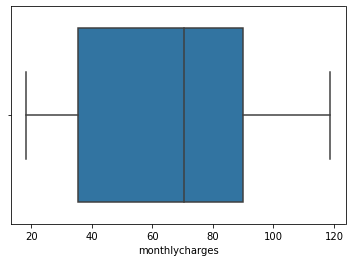

In [34]:
sns.boxplot(x = 'monthlycharges', data = numeric);

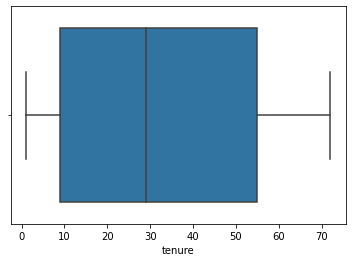

In [36]:
sns.boxplot(x = 'tenure', data = numeric);

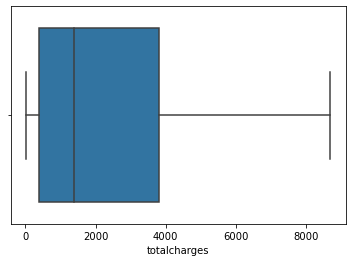

In [35]:
sns.boxplot(x = 'totalcharges', data = numeric);

*Observamos que nuestras variables numéricas no tienen outliers*

In [37]:
#fig, axes = plt.subplots(16, figsize=(15,30))
#axes = axes.flat

#for indice, columna in enumerate(categoric.columns):
#    sns.countplot(x = categoric[columna], hue='churn', data = df, ax=axes[indice]);

#plt.tight_layout()
#fig.delaxes(axes[indice])
#plt.show()

IndexError: index 16 is out of bounds for axis 0 with size 16

Error in callback <function flush_figures at 0x7f7ac0bff310> (for post_execute):


KeyboardInterrupt: 

## Estandarización

In [38]:
scaler = StandardScaler()

In [40]:
scaler.fit(numeric)

StandardScaler()

In [41]:
X_escaladas = scaler.transform(numeric)

In [42]:
numericas_estandar = pd.DataFrame(X_escaladas, columns = numeric.columns)
numericas_estandar.head(2)

,tenure,monthlycharges,totalcharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740


In [45]:
categoric

,customerid,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


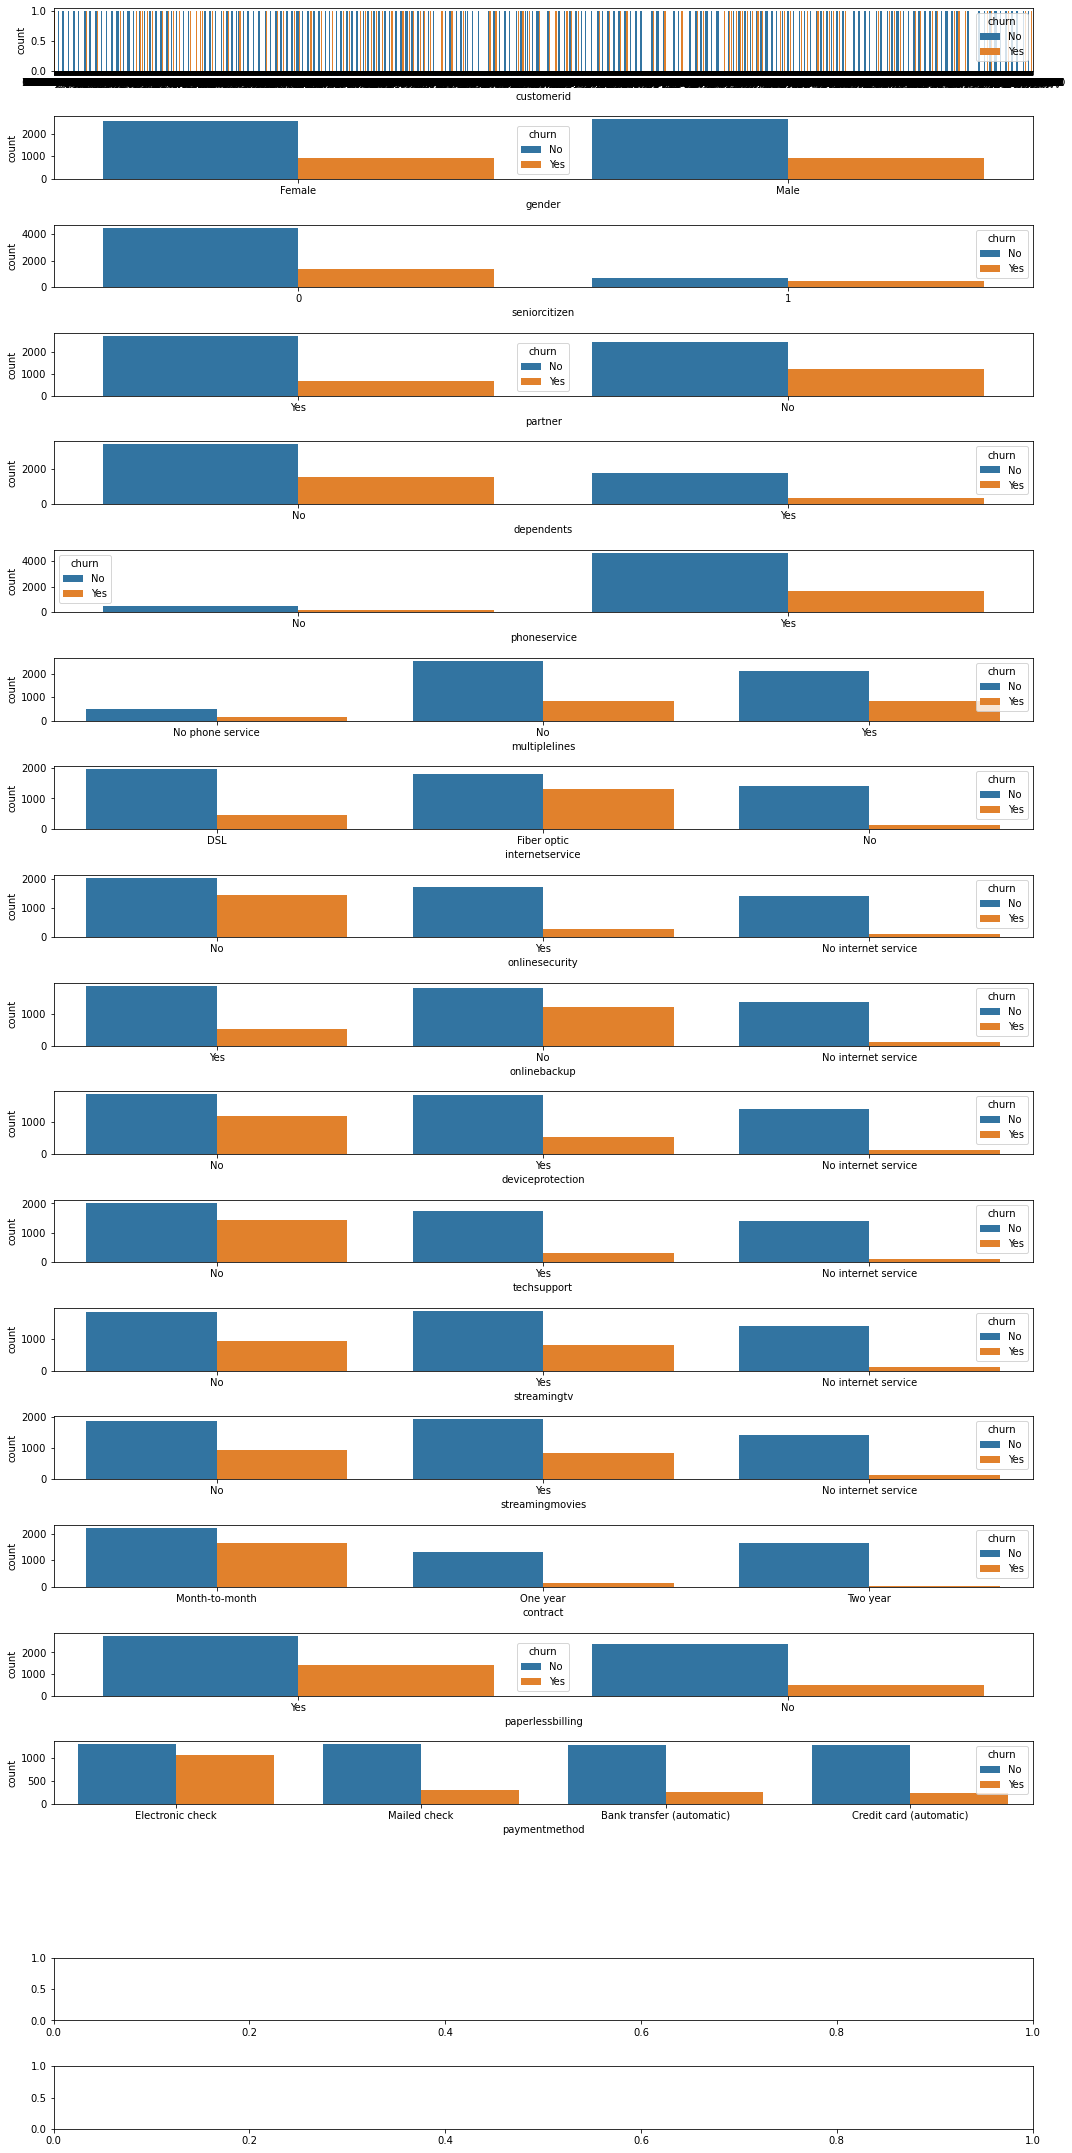

In [44]:
fig, axes = plt.subplots(17, figsize=(15,30))
axes = axes.flat

for indice, columna in enumerate(categoric.columns):
    sns.countplot(x = categoric[columna], hue='churn', data = df, ax=axes[indice]);

plt.tight_layout()
fig.delaxes(axes[indice])
plt.show()